<a href="https://colab.research.google.com/github/Brycexxx/fastai/blob/master/lesson4_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.collab import *

### Collaborative filtering example

In [0]:
user, item, title = 'userID', 'movieID', 'title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/movie_lens_sample/ratings.csv')]

In [5]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0, 5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-02


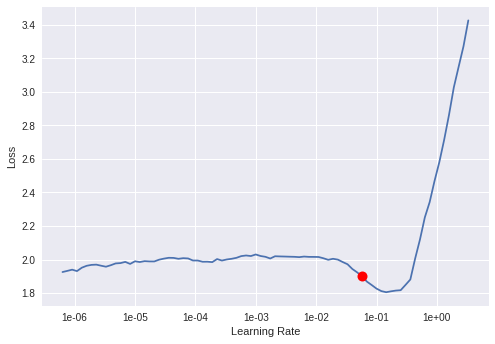

In [13]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4, 5e-3)

epoch,train_loss,valid_loss
1,1.771834,1.388694
2,0.911083,0.682896
3,0.661183,0.658277
4,0.562420,0.653560


### Movielens 100k

In [38]:
! unzip -d /root/.fastai/data ml-100k.zip

Archive:  ml-100k.zip
   creating: /root/.fastai/data/ml-100k/
  inflating: /root/.fastai/data/ml-100k/allbut.pl  
  inflating: /root/.fastai/data/ml-100k/mku.sh  
  inflating: /root/.fastai/data/ml-100k/README  
  inflating: /root/.fastai/data/ml-100k/u.data  
  inflating: /root/.fastai/data/ml-100k/u.genre  
  inflating: /root/.fastai/data/ml-100k/u.info  
  inflating: /root/.fastai/data/ml-100k/u.item  
  inflating: /root/.fastai/data/ml-100k/u.occupation  
  inflating: /root/.fastai/data/ml-100k/u.user  
  inflating: /root/.fastai/data/ml-100k/u1.base  
  inflating: /root/.fastai/data/ml-100k/u1.test  
  inflating: /root/.fastai/data/ml-100k/u2.base  
  inflating: /root/.fastai/data/ml-100k/u2.test  
  inflating: /root/.fastai/data/ml-100k/u3.base  
  inflating: /root/.fastai/data/ml-100k/u3.test  
  inflating: /root/.fastai/data/ml-100k/u4.base  
  inflating: /root/.fastai/data/ml-100k/u4.test  
  inflating: /root/.fastai/data/ml-100k/u5.base  
  inflating: /root/.fastai/data/ml-1

In [0]:
path = Config.data_path()/'ml-100k'

In [41]:
path.ls()

[PosixPath('/root/.fastai/data/ml-100k/u1.test'),
 PosixPath('/root/.fastai/data/ml-100k/ub.base'),
 PosixPath('/root/.fastai/data/ml-100k/u3.base'),
 PosixPath('/root/.fastai/data/ml-100k/u2.test'),
 PosixPath('/root/.fastai/data/ml-100k/u.genre'),
 PosixPath('/root/.fastai/data/ml-100k/u4.base'),
 PosixPath('/root/.fastai/data/ml-100k/u5.base'),
 PosixPath('/root/.fastai/data/ml-100k/u1.base'),
 PosixPath('/root/.fastai/data/ml-100k/ua.test'),
 PosixPath('/root/.fastai/data/ml-100k/README'),
 PosixPath('/root/.fastai/data/ml-100k/u2.base'),
 PosixPath('/root/.fastai/data/ml-100k/allbut.pl'),
 PosixPath('/root/.fastai/data/ml-100k/u.occupation'),
 PosixPath('/root/.fastai/data/ml-100k/mku.sh'),
 PosixPath('/root/.fastai/data/ml-100k/u4.test'),
 PosixPath('/root/.fastai/data/ml-100k/u3.test'),
 PosixPath('/root/.fastai/data/ml-100k/u.user'),
 PosixPath('/root/.fastai/data/ml-100k/u.data'),
 PosixPath('/root/.fastai/data/ml-100k/ub.test'),
 PosixPath('/root/.fastai/data/ml-100k/ua.base'

In [42]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userID,movieID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [43]:

movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieID,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
len(ratings)

100000

In [45]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userID,movieID,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, pct_val=0.1, item_name=title)

In [47]:
data.show_batch()

userID,title,target
682,Twelve Monkeys (1995),4.0
311,"Maltese Falcon, The (1941)",4.0
537,Mother (1996),3.0
261,"Beautician and the Beast, The (1997)",3.0
54,Contact (1997),4.0


In [0]:
y_range = [0, 5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

In [67]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.74E-01


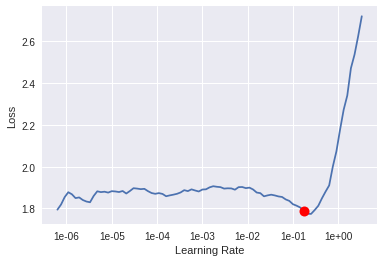

In [68]:
learn.recorder.plot()

Min numerical gradient: 1.74E-01


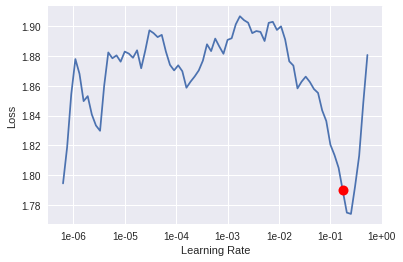

In [69]:
learn.recorder.plot(skip_end=15)

In [70]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss
1,0.919649,0.956181
2,0.907786,0.921355
3,0.828165,0.862825
4,0.631435,0.829815
5,0.474123,0.827292


In [0]:
learn.save('dotprod')

### Interpretation
#### Setup

In [74]:
learn.load('dotprod')

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userID 196; title Kolya (1996); ,userID 63; title Kolya (1996); ,userID 226; title Kolya (1996); ,userID 154; title Kolya (1996); ,userID 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userID 498; title Casino (1995); ,userID 642; title Pocahontas (1995); ,userID 58; title 2001: A Space Odyssey (1968); ,userID 495; title Cat People (1982); ,userID 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[<class 'fastai.basic_tr

In [75]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [76]:

g = rating_movie.groupby(title)['rating'].count()
g[:10]

title
'Til There Was You (1997)                        9
1-900 (1994)                                     5
101 Dalmatians (1996)                          109
12 Angry Men (1957)                            125
187 (1997)                                      41
2 Days in the Valley (1996)                     93
20,000 Leagues Under the Sea (1954)             72
2001: A Space Odyssey (1968)                   259
3 Ninjas: High Noon At Mega Mountain (1998)      5
39 Steps, The (1935)                            59
Name: rating, dtype: int64

In [0]:
top_movies = g.sort_values(ascending=False).index.values[:1000]

In [79]:
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

#### Movie bias

In [80]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [82]:
mean_ratings = rating_movie.groupby('title')['rating'].mean()
mean_ratings[:10]

title
'Til There Was You (1997)                      2.333333
1-900 (1994)                                   2.600000
101 Dalmatians (1996)                          2.908257
12 Angry Men (1957)                            4.344000
187 (1997)                                     3.024390
2 Days in the Valley (1996)                    3.225806
20,000 Leagues Under the Sea (1954)            3.500000
2001: A Space Odyssey (1968)                   3.969112
3 Ninjas: High Noon At Mega Mountain (1998)    1.000000
39 Steps, The (1935)                           4.050847
Name: rating, dtype: float64

In [0]:
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [85]:
movie_ratings[:10]

[(tensor(0.7173), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.4792), 'Contact (1997)', 3.8035363457760316),
 (tensor(0.5005), 'Fargo (1996)', 4.155511811023622),
 (tensor(0.4663), 'Return of the Jedi (1983)', 4.007889546351085),
 (tensor(0.1114), 'Liar Liar (1997)', 3.156701030927835),
 (tensor(0.2093), 'English Patient, The (1996)', 3.656964656964657),
 (tensor(0.2782), 'Scream (1996)', 3.4414225941422596),
 (tensor(0.4084), 'Toy Story (1995)', 3.8783185840707963),
 (tensor(0.3272), 'Air Force One (1997)', 3.6310904872389793),
 (tensor(0.1928), 'Independence Day (ID4) (1996)', 3.438228438228438)]

In [0]:
item0 = lambda o: o[0]

In [87]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.5324),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.4020), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.3662),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3520), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.3488), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.3485), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.3253), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.3180), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.3048), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.3020), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2915), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2899), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2844), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2817), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2688), 'Sgt. Bilko (1996)',

In [89]:
sorted(movie_ratings, key=item0, reverse=True)[:15]

[(tensor(0.7784), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.7397), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.7173), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.6930), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.6674), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.6480), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.6454), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.6452), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.6443), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.6249), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.6114), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.5955), 'Raiders of the Lost Ark (1981)', 4.252380952380952),
 (tensor(0.5951), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.5895), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.5880), 'Boot, Das (1981)', 4.203980099502488)]

#### Movie weights

In [0]:
movie_w = learn.weight(top_movies, is_item=True)

In [91]:
movie_w.shape

torch.Size([1000, 40])

In [92]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0, fac1, fac2 = movie_pca.t()
movie_comp = list(zip(fac0, top_movies))

In [98]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0466), 'Chinatown (1974)'),
 (tensor(1.0037), 'Casablanca (1942)'),
 (tensor(1.0031), 'Wrong Trousers, The (1993)'),
 (tensor(0.9641), 'Lawrence of Arabia (1962)'),
 (tensor(0.9540), 'Close Shave, A (1995)'),
 (tensor(0.9479), 'Citizen Kane (1941)'),
 (tensor(0.9295),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9172), 'Apocalypse Now (1979)'),
 (tensor(0.9048), 'Lone Star (1996)'),
 (tensor(0.8937), 'North by Northwest (1959)')]

In [99]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1549), "McHale's Navy (1997)"),
 (tensor(-1.0931), 'Jungle2Jungle (1997)'),
 (tensor(-1.0800), 'Leave It to Beaver (1997)'),
 (tensor(-1.0777), 'D3: The Mighty Ducks (1996)'),
 (tensor(-0.9943), 'Home Alone 3 (1997)'),
 (tensor(-0.9924), 'Congo (1995)'),
 (tensor(-0.9821), 'Bio-Dome (1996)'),
 (tensor(-0.9458), 'Homeward Bound II: Lost in San Francisco (1996)'),
 (tensor(-0.9223), 'Batman & Robin (1997)'),
 (tensor(-0.9187), 'Free Willy 3: The Rescue (1997)')]

In [0]:
movie_comp = list(zip(fac1, top_movies))

In [101]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2019), 'Braveheart (1995)'),
 (tensor(1.1105), 'Titanic (1997)'),
 (tensor(1.0183), 'Raiders of the Lost Ark (1981)'),
 (tensor(0.9457), "It's a Wonderful Life (1946)"),
 (tensor(0.9291), 'Forrest Gump (1994)'),
 (tensor(0.9088), 'Pretty Woman (1990)'),
 (tensor(0.8417), 'Return of the Jedi (1983)'),
 (tensor(0.8372), "Mr. Holland's Opus (1995)"),
 (tensor(0.8202), 'Sleepless in Seattle (1993)'),
 (tensor(0.7951), 'Independence Day (ID4) (1996)')]

In [103]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.8023), 'Spice World (1997)'),
 (tensor(-0.7761), 'Stupids, The (1996)'),
 (tensor(-0.7529), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.7509), 'Crumb (1994)'),
 (tensor(-0.7303), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.7109), 'Brazil (1985)'),
 (tensor(-0.6856), 'Cable Guy, The (1996)'),
 (tensor(-0.6844), 'Leave It to Beaver (1997)'),
 (tensor(-0.6688), 'Serial Mom (1994)'),
 (tensor(-0.6613), 'Jude (1996)')]

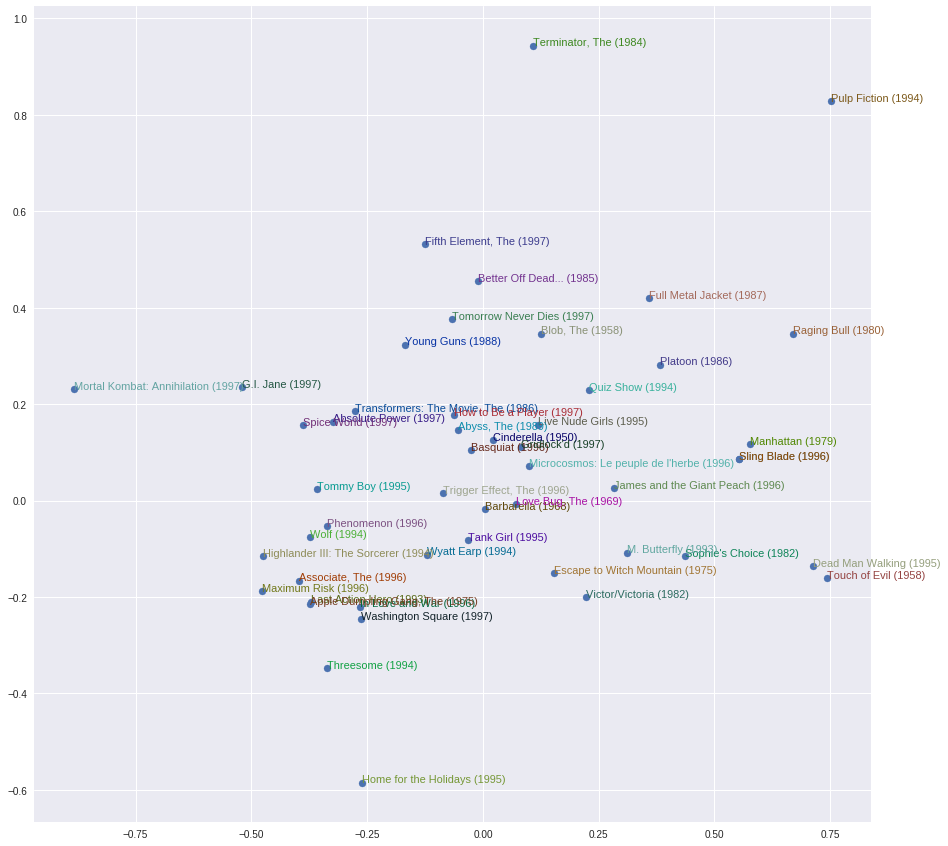

In [111]:
idxs = np.random.choice(len(top_movies), 50, replace=True)
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15, 15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
  plt.text(x, y, i, color=np.random.rand(3)*0.7, fontsize=11)